# Zillow Project: ***Predicting Tax Value with Linear Modeling***

## Imports

In [1]:
# imports used in your project go here 
from wrangle import get_zillow, clean_data, wrangle_zillow
from explore import get_tax_hist, get_county_box, get_county_stat, get_tax_sqft_scatter, get_tax_sqft_stat
from preprocess import preprocess_zillow
from model import get_baseline, get_lassolars_model, get_poly_model, get_ols_model, get_poly_test

## Acquire

* Acquired from MySQL database on 2023-04-05 and saved as a csv file
* Observations: 52,441
    * Each observation is a property identified as a single family residence that had a transaction in 2017
* Features: 4
    * Each feature is a single characteristic about the property and include: 
        * Bedroom count
        * Bathroom count
        * Square feet of the property
        * Tax value amount in dollars        

In [2]:
# getting data and showing the top 5
get_zillow().head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,fips
0,4.0,3.5,3100.0,1023282.0,6059.0
1,2.0,1.0,1465.0,464000.0,6111.0
2,3.0,2.0,1243.0,564778.0,6059.0
3,4.0,3.0,2376.0,145143.0,6037.0
4,4.0,3.0,2962.0,773303.0,6037.0


## Prepare

* Cleaning:
    * Removed outliers
        * Lower limit: Q1 - (1.5 * IQR)
        * Upper limit: Q3 + (1.5 * IQR)
    * Drop null values
    * Removed duplicates
    * Renamed columns
* Prep:
    * Removed all half-bathroom properties
    * Split data into train, test, validate
* Note:
    * Los Angeles County and Orange County are the only counties left after cleaning

In [3]:
# wrangle and split data
train, test, validate = wrangle_zillow()

In [4]:
# examining a sample of the data
train.sample(5)

,beds,baths,square_feet,tax_value,county
12052,4.0,3.0,1884.0,600000.0,Los Angeles
28128,4.0,2.0,1250.0,180688.0,Los Angeles
4589,4.0,2.0,1523.0,62706.0,Los Angeles
44577,3.0,2.0,1470.0,68460.0,Orange
1416,5.0,3.0,2936.0,640115.0,Orange


## Explore

### 1) What does the distribution of property tax value amount look like in our train data?

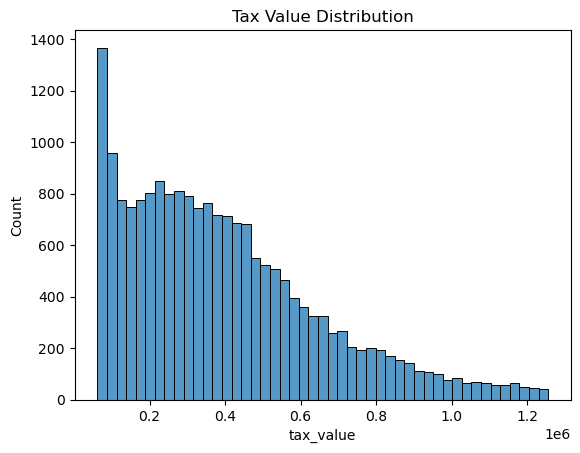

In [5]:
# gettind ditrubution of the tax values
get_tax_hist()

##### Takeaways:
* The target is appears to be normally distributed with the exception of the lowest amount.
* It is likely that many sub-groups of the data will have a similar ditribution
* This low tax-value rate likely represents working-class and low-income areas

###  2) Is there a difference in tax value amount for properties in Orange County compared to properties in Los Angeles County?

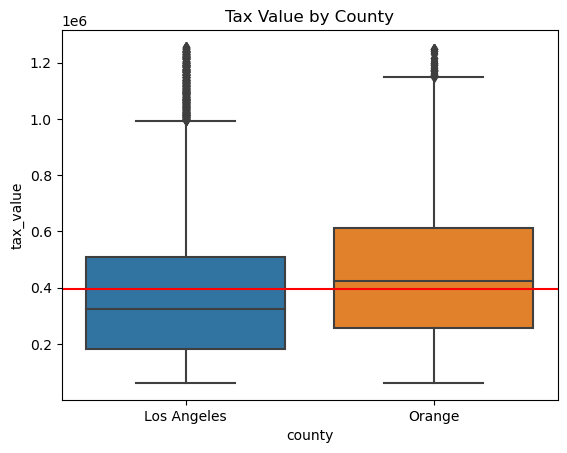

In [6]:
# getting box plots of county tax data
get_county_box()

##### Takeaways:
* Orange County properties have a higher average tax value than Los Angeles County
* Upper outliers still exists after cleaning which is likely because of the skewed-ness of the data. 
* It also may be useful to fins a more granular location feature due to the wide range of home prices in a single county

#### Hypothesis Testing:
>- Mann-whitney: SquareFeet is not normally distributed
>- H$_0$: There is no difference between the tax values of Orange County and Los Angeles County.
>- H$_a$: There is a difference between the tax values of Orange County and Los Angeles County.
>- Confidence Interval: 95%
>- $a$: 0.05

In [7]:
# getting hypothesis test supporting statistic
get_county_stat()


    Mann-Whitney: 26441917.0
    p-value: 2.41114243993854e-73
    


##### Takeaways:
* The p-vlaue is less than $a$, we can refec the null hypothesis
* There is a difference between the tax values of Orange County and Los Angeles County

### 3) What is the relationship between tax value and square feet in Orange County? Los Angeles County?

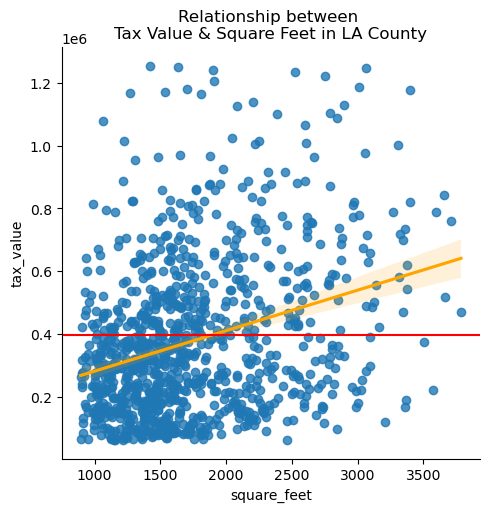

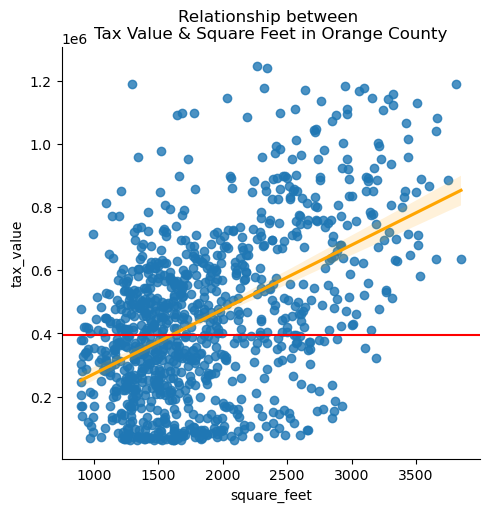

In [8]:
# getting scatter plot
get_tax_sqft_scatter()

#### Takeaways:
* Both appear to have a positive linear correlation with Orange County having a stronger relationship

#### Hypothesis Testing LA:
>- Spearman-r: SquareFeet is not normally distributed
>- H$_0$: There is no linear relationship between square feet and tax value for properties in LA.
>- H$_a$: There is a linear relationship between square feet and tax value for properties in LA.
>- Confidence Interval: 95%
>- $a$: 0.05

#### Hypothesis Testing OC:
>- Spearman-r: SquareFeet is not normally distributed
>- H$_0$: There is no linear relationship between square feet and tax value for properties in OC.
>- H$_a$: There is a linear relationship between square feet and tax value for properties in OC.
>- Confidence Interval: 95%
>- $a$: 0.05

In [9]:
# getting spearman r for both LA county and OC
get_tax_sqft_stat()

Los Angeles County
    Spearman r: 0.3027484197443469
    p-value: 0.0
    
Orange County
    Spearman r: 0.39908013105494444
    p-value: 9.816246014205157e-166
    


##### Takeaways:
* The null hypothesis can be rejected for both due to both p-values being below $a$.
* Orange County and Los Angeles County properties' square feet have a linear relationship with their tax value
* I will only focus on OC in modeling because there is a greater correlation out of the two and becasue of time

## Exploration Summary
* Our tax value is not normally ditributed
* There is a difference in the tax value of properties in Orange County and Los Angeles County
* There is a stronger correlation between square feet and tax value for homes in Orange County than Los Angeles County properties

**Modeling**
* Square Feet
* Bedrooms
* Bathrooms
* Only Orange County properties

## Modeling

In [10]:
# preprocessing: scaling data
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = preprocess_zillow()

### Introduction
* The models will be evaluated using the RMSE for its readability and ability to reduce the impact of outliers
* Due to the limited number of features used in modeling, success for this stage is a model perfroming better than the baseline
* The baseline was calculated by taking the mean of the tax value

In [11]:
# getting baseline and baseline metrics
get_baseline()

Baseline Model
    Baseline: 451120.36
    RMSE on Train: 259532.84
    RMSE on Validate: 255477.65
    RMSE Difference: 4055.19


### Top Three Models

In [12]:
# getting LassoLars model
get_lassolars_model()

LassoLars Alpha-1 Model
    RMSE on Train: 226149.9063
    RMSE on Validate: 227244.7269
    RMSE Difference: -1094.8206


In [13]:
# getting polynomial model
get_poly_model()

Polynomial 2-degree Model
    RMSE on Train: 224173.5278
    RMSE on Validate: 225427.9259
    RMSE Difference: -1254.3982


In [14]:
# getting ols model
get_ols_model()

OLS Model
    RMSE on Train: 226149.8616
    RMSE on Validate: 227253.9366
    RMSE Difference: -1104.075


### Best Model
* The polynomial regression model will be selected due to its lower RMSE
* While the other models are more precise, the RMSE on validate is still lower for the polynomial model regardless of the gap in RMSE difference

In [15]:
# getting poly model run on test
get_poly_test()

Polynomial 2-degree Model
    RMSE on Train: 224173.5278
    RMSE on Test: 226917.6663
    RMSE Difference: -2744.1385


### Modeling Wrap 
* The polynomial model performed better than the baseline
* I would not recommend the use of this model in production, but as a starting point for more refined and precise modeling

## Conclusion

### Summary

* Our tax value is not normally ditributed
* There is a difference in the tax value of properties in Orange County and Los Angeles County
* There is a stonger correlation between square feet and tax value for homes in Orange County than Los Angeles County proerties
* Drivers discovered did lead to the success of performing better than the baseline

### Recommendations
* Find data that represents smaller geographic areas for each property, such as zip codes, due to the wide range of tax values in a single county
* Extend the life of this project to increase time for feature selection and feature engineering

### Next Steps
* Separate data by fips code/county before cleaning
* Explore the outliers that still exist after accounting for outliers in the cleaning phase
* Explore and model based on half-bathroom features
* Add more features from the database and explore/engineer the features for more precise modeling
* Model for proerties in other counties